Work on Reading a Complex Excel File
https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook

https://stackoverflow.com/questions/21443963/pandas-multilevel-column-names

In [48]:
import pandas as pd
xls = pd.ExcelFile('Z32H-Charge-Discharge-Curve.xlsx')


In [49]:
# Now you can list all sheets in the file
xls.sheet_names
# ['house', 'house_extra', ...]


['Charge 25 Degree', 'Discharge 0 25 45 degree', 'Sheet2']

In [50]:
# to read just one sheet to dataframe:
xls = pd.read_excel('Z32H-Charge-Discharge-Curve.xlsx',sheet_name=1,skiprows=31,usecols='C:FZ')

In [51]:
display(xls)

,步骤时间,Unnamed: 3,电流/mA,容量/mAh,电压/V,步骤时间.1,Unnamed: 8,电流/mA.1,容量/mAh.1,电压/V.1,...,步骤时间.34,Unnamed: 173,电流/mA.34,容量/mAh.34,电压/V.34,步骤时间.35,Unnamed: 178,电流/mA.35,容量/mAh.35,电压/V.35
0,00:00:00,0.000000,-6.390,0.000,4.3663,00:00:00,0.000000,-6.371,0.000,4.3663,...,00:00:00,0.000000,-6.4,0.00,4.2671,00:00:00,0.000000,-6.40,0.00,4.2677
1,00:00:38,0.633333,-6.390,0.068,4.3548,00:00:54,0.900000,-6.380,0.096,4.3527,...,00:00:59,0.983333,-6.4,0.11,4.2333,00:00:59,0.983333,-6.41,0.11,4.2333
2,00:01:38,1.633333,-6.390,0.175,4.3465,00:01:54,1.900000,-6.377,0.203,4.3452,...,00:01:59,1.983333,-6.4,0.21,4.2122,00:01:59,1.983333,-6.40,0.21,4.2122
3,00:02:38,2.633333,-6.390,0.282,4.3412,00:02:54,2.900000,-6.377,0.309,4.3409,...,00:03:00,3.000000,-6.4,0.32,4.1986,00:03:00,3.000000,-6.40,0.32,4.1992
4,00:03:38,3.633333,-6.399,0.389,4.3359,00:03:55,3.916667,-6.377,0.416,4.3359,...,00:03:59,3.983333,-6.4,0.43,4.1905,00:03:59,3.983333,-6.40,0.43,4.1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,05:06:38,306.633333,-6.390,32.679,3.1855,05:06:54,306.900000,-6.374,32.623,3.1870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,05:07:38,307.633333,-6.390,32.786,3.1073,05:07:54,307.900000,-6.377,32.730,3.1055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,05:08:31,308.516667,-6.399,32.879,2.9998,05:08:45,308.750000,-6.374,32.820,3.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
c = [(f'Case{i}',f'U{j}',f'{k}')  for i in range(1,13) for j in range(1,4) for k in ['Time','Tm','iD','Q','V']]

In [53]:
xls.columns=pd.MultiIndex.from_tuples(c)


In [54]:
xls

Case1                                                                  \
           U1                                           U2                      
         Time          Tm     iD       Q       V      Time          Tm     iD   
0    00:00:00    0.000000 -6.390   0.000  4.3663  00:00:00    0.000000 -6.371   
1    00:00:38    0.633333 -6.390   0.068  4.3548  00:00:54    0.900000 -6.380   
2    00:01:38    1.633333 -6.390   0.175  4.3465  00:01:54    1.900000 -6.377   
3    00:02:38    2.633333 -6.390   0.282  4.3412  00:02:54    2.900000 -6.377   
4    00:03:38    3.633333 -6.399   0.389  4.3359  00:03:55    3.916667 -6.377   
..        ...         ...    ...     ...     ...       ...         ...    ...   
307  05:06:38  306.633333 -6.390  32.679  3.1855  05:06:54  306.900000 -6.374   
308  05:07:38  307.633333 -6.390  32.786  3.1073  05:07:54  307.900000 -6.377   
309  05:08:31  308.516667 -6.399  32.879  2.9998  05:08:45  308.750000 -6.374   
310       NaN         NaN    NaN     NaN     NaN       NaN         NaN    NaN   
311       NaN         NaN    NaN     NaN     NaN       NaN         NaN    NaN   

                     ...    Case12                                         \
                     ...        U2                                     U3   
          Q       V  ...      Time        Tm   iD     Q       V      Time   
0     0.000  4.3663  ...  00:00:00  0.000000 -6.4  0.00  4.2671  00:00:00   
1     0.096  4.3527  ...  00:00:59  0.983333 -6.4  0.11  4.2333  00:00:59   
2     0.203  4.3452  ...  00:01:59  1.983333 -6.4  0.21  4.2122  00:01:59   
3     0.309  4.3409  ...  00:03:00  3.000000 -6.4  0.32  4.1986  00:03:00   
4     0.416  4.3359  ...  00:03:59  3.983333 -6.4  0.43  4.1905  00:03:59   
..      ...     ...  ...       ...       ...  ...   ...     ...       ...   
307  32.623  3.1870  ...       NaN       NaN  NaN   NaN     NaN       NaN   
308  32.730  3.1055  ...       NaN       NaN  NaN   NaN     NaN       NaN   
309  32.820  3.0001  ...       NaN       NaN  NaN   NaN     NaN       NaN   
310     NaN     NaN  ...       NaN       NaN  NaN   NaN     NaN       NaN   
311     NaN     NaN  ...       NaN       NaN  NaN   NaN     NaN       NaN   

                                   
                                   
           Tm    iD     Q       V  
0    0.000000 -6.40  0.00  4.2677  
1    0.983333 -6.41  0.11  4.2333  
2    1.983333 -6.40  0.21  4.2122  
3    3.000000 -6.40  0.32  4.1992  
4    3.983333 -6.40  0.43  4.1908  
..        ...   ...   ...     ...  
307       NaN   NaN   NaN     NaN  
308       NaN   NaN   NaN     NaN  
309       NaN   NaN   NaN     NaN  
310       NaN   NaN   NaN     NaN  
311       NaN   NaN   NaN     NaN  

[312 rows x 180 columns]

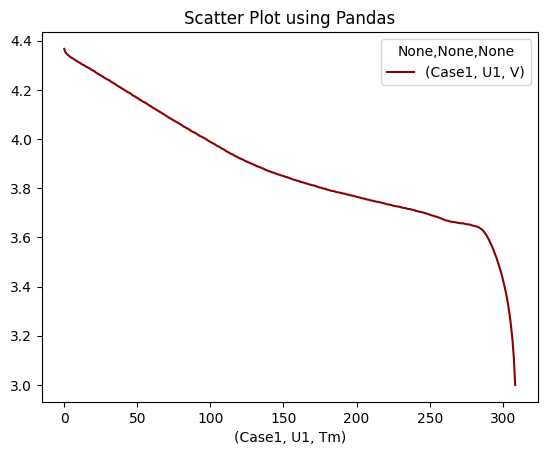

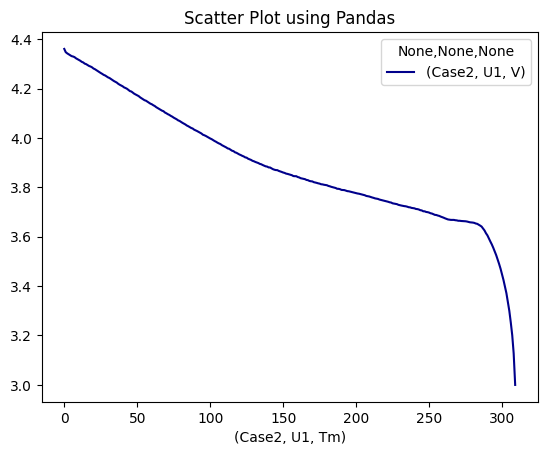

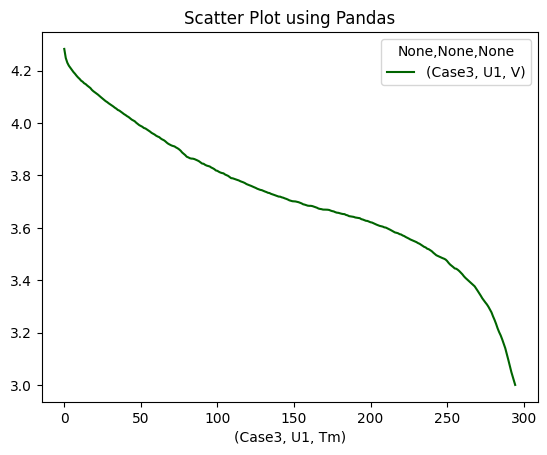

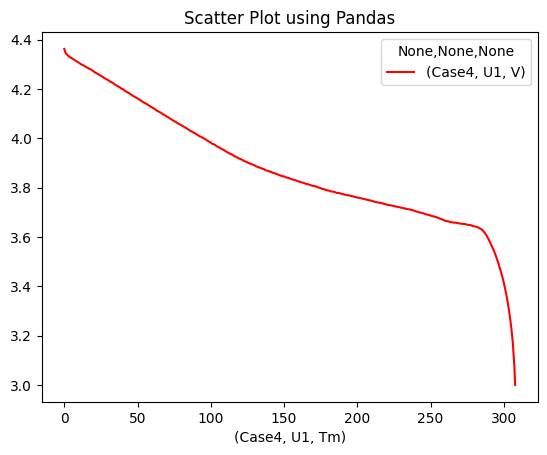

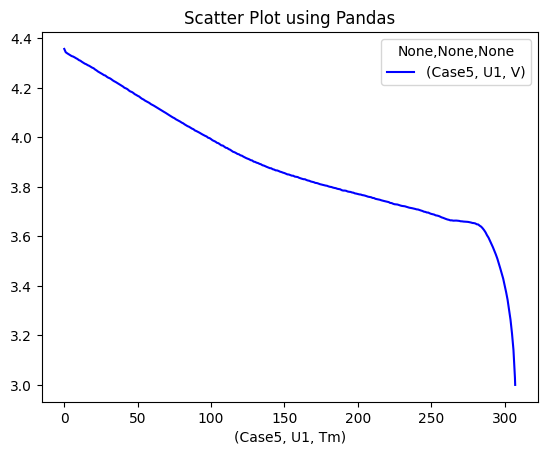

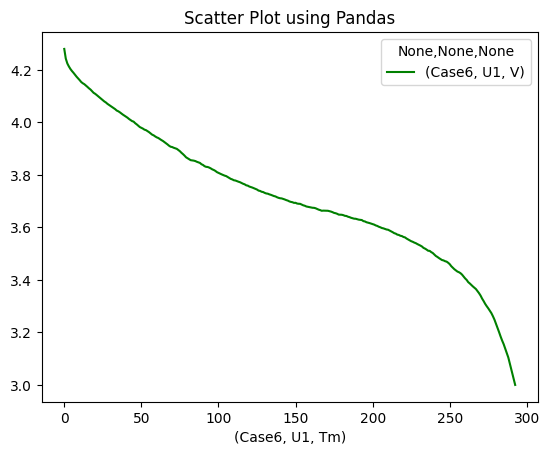

In [55]:
import matplotlib.pyplot as plt
xls.plot.line(x=('Case1','U1','Tm'), y=('Case1','U1','V'), marker=None, c="DarkRed",  title="Scatter Plot using Pandas")
xls.plot.line(x=('Case2','U1','Tm'), y=('Case2','U1','V'), marker=None, c="DarkBlue", title="Scatter Plot using Pandas")
xls.plot.line(x=('Case3','U1','Tm'), y=('Case3','U1','V'), marker=None,c="DarkGreen", title="Scatter Plot using Pandas")
xls.plot.line(x=('Case4','U1','Tm'), y=('Case4','U1','V'), marker=None, c="Red",      title="Scatter Plot using Pandas")
xls.plot.line(x=('Case5','U1','Tm'), y=('Case5','U1','V'), marker=None, c="Blue",     title="Scatter Plot using Pandas")
xls.plot.line(x=('Case6','U1','Tm'), y=('Case6','U1','V'), marker=None, c="Green",    title="Scatter Plot using Pandas")
plt.show()

['Case1', 'Case2', 'Case3', 'Case4', 'Case5', 'Case6', 'Case7', 'Case8', 'Case9', 'Case10', 'Case11', 'Case12']


C:\Users\mbieg\AppData\Local\Temp\ipykernel_16824\2256321013.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset_df = xls.loc[:, (cs, "U1")]


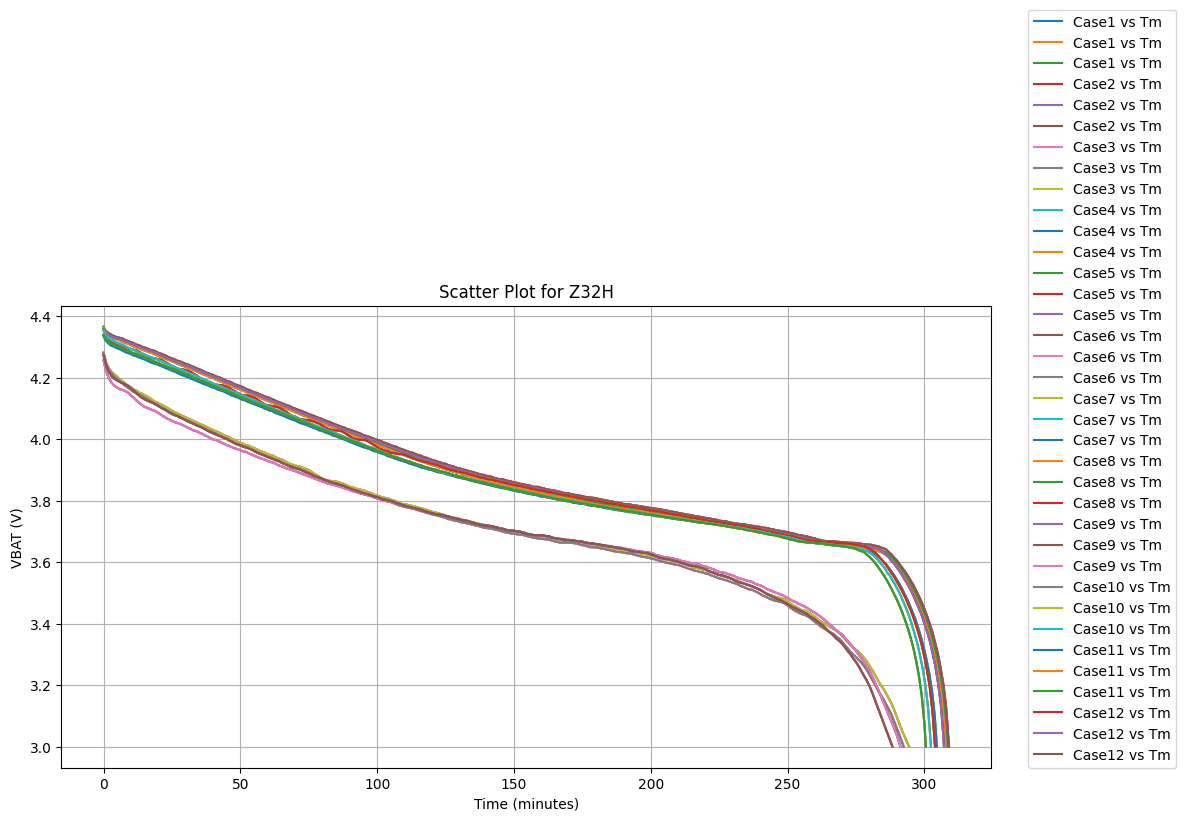

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

cases=["Case"+str(i) for i in range(1,13)]
units=["U"+str(i) for i in range(1,4)]
print(cases)
for cs in cases:
    for u in units:
        subset_df = xls.loc[:, (cs, "U1")]
        plt.plot(subset_df['Tm'], subset_df['V'], marker=None,label=f"{cs} vs Tm")
plt.xlabel('Time (minutes)')
plt.ylabel('VBAT (V)')
plt.title(f"Scatter Plot for Z32H")
plt.legend(loc=(1.04, 0))
plt.grid(True)

In [57]:
subset_df

,Time,Tm,iD,Q,V
0,00:00:00,0.000000,-6.4,0.00,4.2730
1,00:00:59,0.983333,-6.4,0.11,4.2389
2,00:01:59,1.983333,-6.4,0.21,4.2191
3,00:03:00,3.000000,-6.4,0.32,4.2045
4,00:03:59,3.983333,-6.4,0.43,4.1967
...,...,...,...,...,...
307,NaN,NaN,NaN,NaN,NaN
308,NaN,NaN,NaN,NaN,NaN
309,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN
